<a href="https://colab.research.google.com/github/JenniferWang1234/Jennifer_Wang_DataBootcamp_Final/blob/main/Jennifer_Wang_FinalModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Students’ Exam Scores Through Lifestyle Habits

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [ ]:
# load the updated Dataset
updated_data = 'updated_student_habits_performance.csv'
df = pd.read_csv(updated_data)

In [ ]:
# display first five rows of dataset
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,screentime_study_ratio,sleep_study_ratio,exercise_study_ratio
0,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,0.739130,0.666667,0.869565
1,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,3.142857,5.714286,0.714286
2,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,4.900000,9.200000,4.000000
3,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,0.980000,0.980000,0.600000
4,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0,0.180556,1.027778,0.138889


In [ ]:
# overview of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     987 non-null    object 
 1   age                            987 non-null    int64  
 2   gender                         987 non-null    object 
 3   study_hours_per_day            987 non-null    float64
 4   social_media_hours             987 non-null    float64
 5   netflix_hours                  987 non-null    float64
 6   part_time_job                  987 non-null    object 
 7   attendance_percentage          987 non-null    float64
 8   sleep_hours                    987 non-null    float64
 9   diet_quality                   987 non-null    object 
 10  exercise_frequency             987 non-null    int64  
 11  parental_education_level       897 non-null    object 
 12  internet_quality               987 non-null    obj

## Modeling & Interpretations

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

#### Baseline Model

In [ ]:
# create baseline model using mean exam score
y = df['exam_score']
baseline_preds = y.mean()*np.ones(len(y))

# calculate the MSE of my baseline predictions
baseline_mse = mean_squared_error(y, baseline_preds)
print(f'Baseline MSE: {baseline_mse}')

Baseline MSE: 275.9682413831686


#### Multiple Regression Model

In [ ]:
# establish X & y
predictors = ['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours',
              'diet_quality', 'exercise_frequency', 'extracurricular_participation',
              'screentime_study_ratio', 'sleep_study_ratio', 'exercise_study_ratio']
X = df[predictors]
y = df['exam_score']

# split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [ ]:
# define categorical features
cat_col = ['part_time_job', 'diet_quality', 'extracurricular_participation']

# encode categorical features using make_column_transformer
transformer = make_column_transformer((OneHotEncoder(drop='first', sparse_output=False), cat_col),
                                      remainder='passthrough')

In [ ]:
# create a pipeline for multiple regression model
lr_pipe = Pipeline([('transformer', transformer),
                    ('model', LinearRegression())])

In [ ]:
# fit multiple regression pipeline
lr_pipe.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['part_time_job',
                                                   'diet_quality',
                                                   'extracurricular_participation'])])),
                ('model', LinearRegression())])

In [ ]:
# extract coefficients from the multipel regression model
lr_coefs = lr_pipe.named_steps['model'].coef_

# retrieve the names of all independent variables
features = lr_pipe.named_steps['transformer'].get_feature_names_out()

# create a dataframe with feature names and coefficients
pd.DataFrame({'Coefficient': lr_coefs}, index = features)

,Coefficient
onehotencoder__part_time_job_Yes,-0.060898
onehotencoder__diet_quality_Good,0.446345
onehotencoder__diet_quality_Poor,0.754917
onehotencoder__extracurricular_participation_Yes,-0.049545
remainder__study_hours_per_day,9.271123
remainder__social_media_hours,-2.335362
remainder__netflix_hours,-1.926382
remainder__attendance_percentage,0.136076
remainder__sleep_hours,2.049878
remainder__exercise_frequency,1.234282


In [ ]:
# find y-intercept
lr_pipe.named_steps['model'].intercept_

np.float64(18.152132180213663)

In [ ]:
# make predictions on the training data
lr_ytrain_preds = lr_pipe.predict(X_train)

# calculate MSE for training data
lr_train_mse = mean_squared_error(y_train, lr_ytrain_preds)
print(f'LR Training MSE: {lr_train_mse}')

LR Training MSE: 56.50135803959367


In [ ]:
# make predictions on the testing data
lr_ytest_preds = lr_pipe.predict(X_test)

# calculate MSE for testing data
lr_test_mse = mean_squared_error(y_test, lr_ytest_preds)
print(f'LR Testing MSE: {lr_test_mse}')

LR Testing MSE: 63.902574457272195


In [ ]:
# evaluate feature importance
# calculate permutation importance
lr_importance = permutation_importance(lr_pipe, X_test, y_test, n_repeats=10)

# extract feature importance scores
lr_importance_scores = lr_importance.importances_mean

# create a dataframe to display feature importance
pd.DataFrame({'Permutation Importance': lr_importance_scores}, index=X_train.columns.tolist())

,Permutation Importance
study_hours_per_day,1.145242
social_media_hours,0.048821
netflix_hours,0.036753
part_time_job,-0.000182
attendance_percentage,0.012327
sleep_hours,0.030435
diet_quality,-0.000563
exercise_frequency,0.066869
extracurricular_participation,-0.000022
screentime_study_ratio,0.012424


#### Lasso Regression Model

In [ ]:
# establish X & y
predictors = ['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours',
              'diet_quality', 'exercise_frequency', 'extracurricular_participation',
              'screentime_study_ratio', 'sleep_study_ratio', 'exercise_study_ratio']
X = df[predictors]
y = df['exam_score']

# split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [ ]:
# define categorical features
cat_col = ['part_time_job', 'diet_quality', 'extracurricular_participation']

# encode categorical features using make_column_transformer
transformer = make_column_transformer((OneHotEncoder(drop='first', sparse_output=False), cat_col),
                                      remainder='passthrough')

In [ ]:
# create a pipeline for lasso regression model, with regularization strength paramater set to 0.1
la_pipe = Pipeline([('transformer', transformer),
                    ('model', Lasso(alpha=0.1))])

In [ ]:
# fit lasso regression pipeline
la_pipe.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['part_time_job',
                                                   'diet_quality',
                                                   'extracurricular_participation'])])),
                ('model', Lasso(alpha=0.1))])

In [ ]:
# extract coefficients from the lasso regression model
la_coefs = la_pipe.named_steps['model'].coef_

# retrieve the names of all independent variables
features = la_pipe.named_steps['transformer'].get_feature_names_out()

# create a dataframe with feature names and coefficients
la_coefs_df = pd.DataFrame({'Coefficient': la_coefs}, index = features)
la_coefs_df

,Coefficient
onehotencoder__part_time_job_Yes,-0.000000
onehotencoder__diet_quality_Good,0.000000
onehotencoder__diet_quality_Poor,0.000000
onehotencoder__extracurricular_participation_Yes,-0.000000
remainder__study_hours_per_day,9.204999
remainder__social_media_hours,-2.255737
remainder__netflix_hours,-1.831430
remainder__attendance_percentage,0.133420
remainder__sleep_hours,1.974471
remainder__exercise_frequency,1.238306


In [ ]:
# extract variables with a coefficient of zero
zero_coef = la_coefs_df[la_coefs_df['Coefficient'] == 0].index.tolist()

zero_coef

['onehotencoder__part_time_job_Yes',
 'onehotencoder__diet_quality_Good',
 'onehotencoder__diet_quality_Poor',
 'onehotencoder__extracurricular_participation_Yes',
 'remainder__sleep_study_ratio']

In [ ]:
# make predictions on the training data
la_ytrain_preds = la_pipe.predict(X_train)

# calculate MSE for training data
la_train_mse = mean_squared_error(y_train, la_ytrain_preds)
print(f'LA Training MSE: {la_train_mse}')

LA Training MSE: 56.6197689108401


In [ ]:
# make predictions on the testing data
la_ytest_preds = la_pipe.predict(X_test)

# calculate MSE for testing data
la_test_mse = mean_squared_error(y_test, la_ytest_preds)
print(f'LA Testing MSE: {la_test_mse}')

LA Testing MSE: 63.78820756625925


In [ ]:
# evaluate feature importance
# calculate permutation importance
la_importance = permutation_importance(la_pipe, X_test, y_test, n_repeats=10)

# extract feature importance scores
la_importance_scores = la_importance.importances_mean

# create a dataframe to display feature importance
pd.DataFrame({'Permutation Importance': la_importance_scores}, index=X_train.columns.tolist())

,Permutation Importance
study_hours_per_day,1.143473
social_media_hours,0.041904
netflix_hours,0.025068
part_time_job,0.000000
attendance_percentage,0.009117
sleep_hours,0.028109
diet_quality,0.000000
exercise_frequency,0.072242
extracurricular_participation,0.000000
screentime_study_ratio,0.013241


#### K-Nearest Neighbors Regression Model

In [ ]:
# establish X & y
predictors = ['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours',
              'diet_quality', 'exercise_frequency', 'extracurricular_participation',
              'screentime_study_ratio', 'sleep_study_ratio', 'exercise_study_ratio']
X = df[predictors]
y = df['exam_score']

# split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [ ]:
# define categorical features
cat_col = ['part_time_job', 'diet_quality', 'extracurricular_participation']

# encode categorical features & scale the data using make_column_transformer
transformer = make_column_transformer((OneHotEncoder(drop='first', sparse_output=False), cat_col),
                                      remainder=StandardScaler())

In [ ]:
# create a pipeline for knn regression model
knn_pipe = Pipeline([('transformer', transformer),
                    ('model', KNeighborsRegressor())])

In [ ]:
# define grid of hyperparameters for number of neighbors
param_grid = {'model__n_neighbors': range(2, 51, 2)}

In [ ]:
# perform grid search with cross validation
knn_grid = GridSearchCV(knn_pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
# fit knn regression pipeline
knn_grid.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['part_time_job',
                                                                          'diet_quality',
                                                                          'extracurricular_participation'])])),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': range(2, 51, 2)},
             scoring='neg_mean_squared_error')

In [ ]:
# determine the best parameter (# of neighbors)
knn_grid.best_params_

{'model__n_neighbors': 16}

In [ ]:
# use 16 neighbors in knn model
knn = knn_grid.best_estimator_

In [ ]:
# make predictions on the training data
knn_ytrain_preds = knn.predict(X_train)

# calculate MSE for training data
knn_train_mse = mean_squared_error(y_train, knn_ytrain_preds)
print(f'KNN Training MSE: {knn_train_mse}')

KNN Training MSE: 72.48475988197085


In [ ]:
# make predictions on the testing data
knn_ytest_preds = knn.predict(X_test)

# calculate MSE for testing data
knn_test_mse = mean_squared_error(y_test, knn_ytest_preds)
print(f'KNN Testing MSE: {knn_test_mse}')

KNN Testing MSE: 91.50762054135105


In [ ]:
# evaluate feature importance
# calculate permutation importance
knn_importance = permutation_importance(knn, X_test, y_test, n_repeats=10)

# extract feature importance scores
knn_importance_scores = knn_importance.importances_mean

# create a dataframe to display feature importance
pd.DataFrame({'Permutation Importance': knn_importance_scores}, index=X_train.columns.tolist())

,Permutation Importance
study_hours_per_day,0.551431
social_media_hours,0.014024
netflix_hours,0.012879
part_time_job,-0.002616
attendance_percentage,0.016606
sleep_hours,0.019242
diet_quality,-0.005035
exercise_frequency,0.064924
extracurricular_participation,-0.001806
screentime_study_ratio,0.096584


#### Decision Tree Regression Model

In [ ]:
# establish X & y
predictors = ['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours',
              'diet_quality', 'exercise_frequency', 'extracurricular_participation',
              'screentime_study_ratio', 'sleep_study_ratio', 'exercise_study_ratio']
X = df[predictors]
y = df['exam_score']

# split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [ ]:
# define categorical features
cat_col = ['part_time_job', 'diet_quality', 'extracurricular_participation']

# encode categorical features using make_column_transformer
transformer = make_column_transformer((OneHotEncoder(sparse_output=False), cat_col),
                                      verbose_feature_names_out = False,
                                      remainder='passthrough')

In [ ]:
# fit & transform data
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

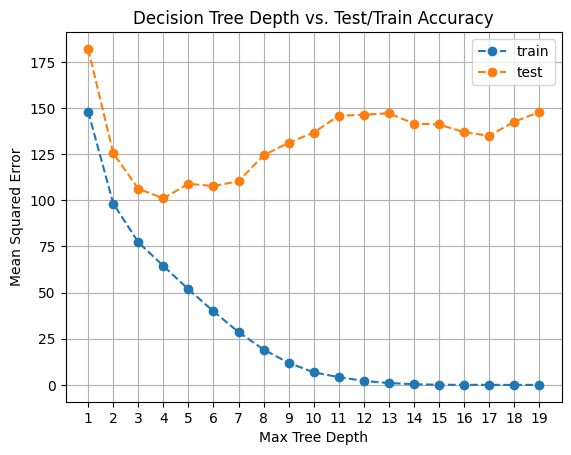

In [ ]:
# find the optimal max depth to avoid overfitting by plotting the test accuracies & finding the minimum one
# create two empty lists to store decision tree's performance on the training and testing data
train_scores = []
test_scores = []

# iterate through 1-19 max depth
for d in range(1, 20):
    dtree = DecisionTreeRegressor(max_depth = d).fit(X_train_transformed, y_train)
    y_train_preds = dtree.predict(X_train_transformed)
    y_test_preds = dtree.predict(X_test_transformed)
    train_mse = mean_squared_error(y_train, y_train_preds)
    test_mse = mean_squared_error(y_test, y_test_preds)
    train_scores.append(train_mse)
    test_scores.append(test_mse)

# plot train and test score against corresponding mean squared error
plt.plot(range(1, 20), train_scores, '--o', label = 'train')
plt.plot(range(1, 20), test_scores, '--o', label = 'test')
plt.xticks(range(1, 20))
plt.xlabel('Max Tree Depth')
plt.ylabel('Mean Squared Error')
plt.title('Decision Tree Depth vs. Test/Train Accuracy')
plt.grid()
plt.legend();

In [ ]:
# fit the decision tree model with a max depth of 4, which has the lowest mse test score on the graph
dtree = DecisionTreeRegressor(max_depth = 4)
dtree.fit(X_train_transformed, y_train)

DecisionTreeRegressor(max_depth=4)

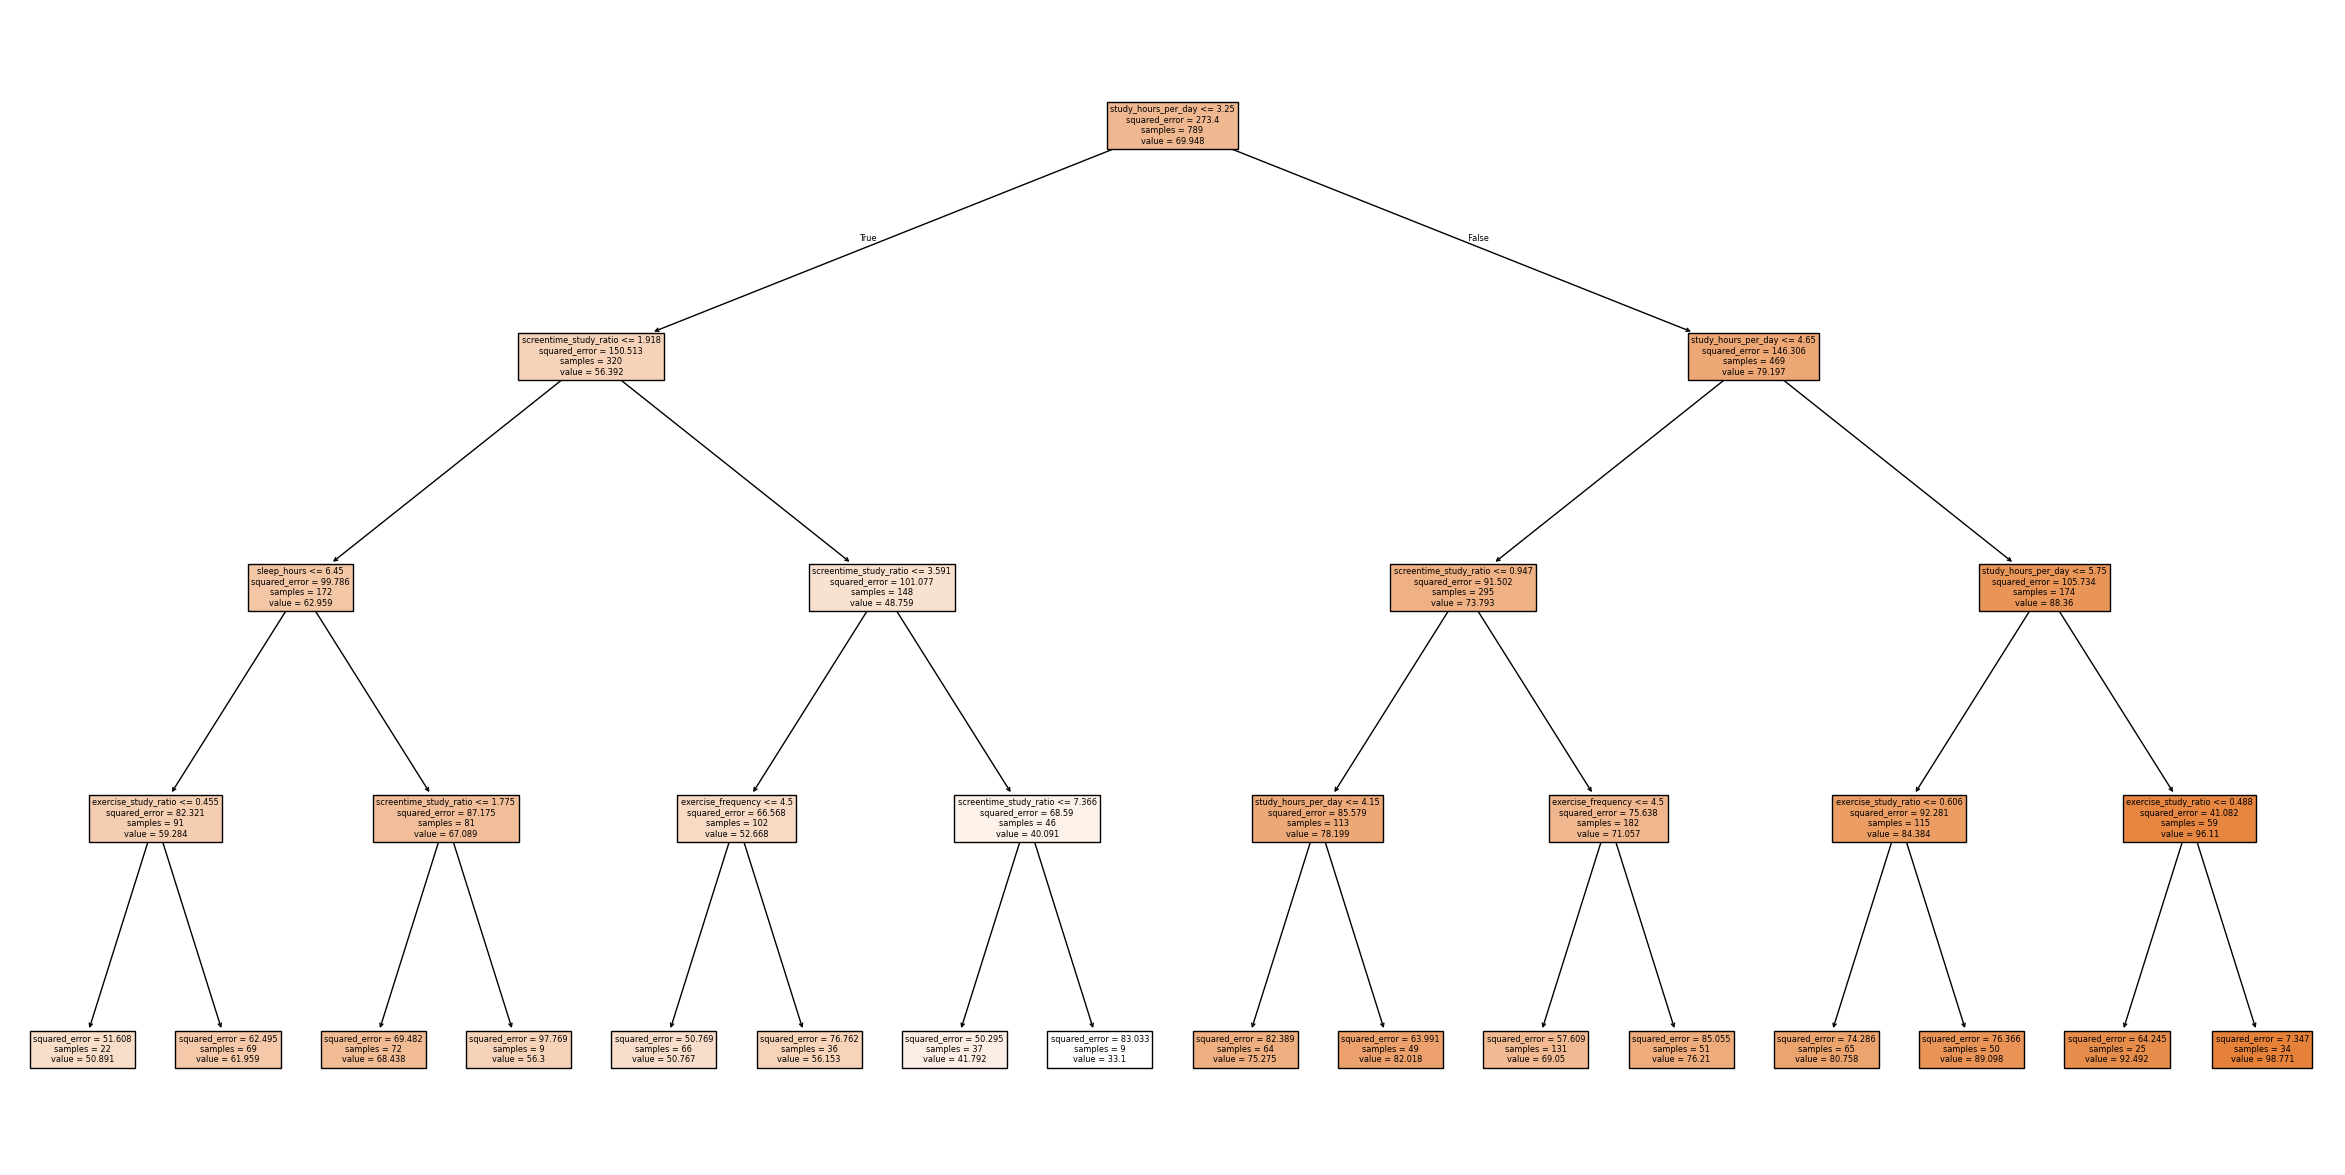

In [ ]:
# plot the decision tree
plt.figure(figsize = (30, 15))
plot_tree(dtree, feature_names = transformer.get_feature_names_out().tolist(), filled = True);

In [ ]:
# make predictions on the training data
dtree_ytrain_preds = dtree.predict(X_train_transformed)

# calculate MSE for training data
dtree_train_mse = mean_squared_error(y_train, dtree_ytrain_preds)
print(f'DTree Training MSE: {dtree_train_mse}')

DTree Training MSE: 64.44659055490288


In [ ]:
# make predictions on the testing data
dtree_ytest_preds = dtree.predict(X_test_transformed)

# calculate MSE for testing data
dtree_test_mse = mean_squared_error(y_test, dtree_ytest_preds)
print(f'DTree Testing MSE: {dtree_test_mse}')

DTree Testing MSE: 101.06450597765584


In [ ]:
# evaluate feature importance
# calculate permutation importance
dtree_importance = permutation_importance(dtree, X_test_transformed, y_test, n_repeats=10)

# extract feature importance scores
dtree_importance_scores = dtree_importance.importances_mean

# create a dataframe to display feature importance
pd.DataFrame({'Permutation Importance': dtree_importance_scores}, index=transformer.get_feature_names_out().tolist())

,Permutation Importance
part_time_job_No,0.000000
part_time_job_Yes,0.000000
diet_quality_Fair,0.000000
diet_quality_Good,0.000000
diet_quality_Poor,0.000000
extracurricular_participation_No,0.000000
extracurricular_participation_Yes,0.000000
study_hours_per_day,0.929784
social_media_hours,0.000000
netflix_hours,0.000000


#### Random Forest Regression Model

In [ ]:
# establish X & y
predictors = ['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours',
              'diet_quality', 'exercise_frequency', 'extracurricular_participation',
              'screentime_study_ratio', 'sleep_study_ratio', 'exercise_study_ratio']
X = df[predictors]
y = df['exam_score']

# split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [ ]:
# define categorical features
cat_col = ['part_time_job', 'diet_quality', 'extracurricular_participation']

# encode categorical features using make_column_transformer
transformer = make_column_transformer((OneHotEncoder(drop='first', sparse_output=False), cat_col),
                                      remainder='passthrough')

In [ ]:
# create a pipeline for random forest regression model
rf_pipe = Pipeline([('transformer', transformer),
                    ('model', RandomForestRegressor())])

In [ ]:
# define grid of hyperparameters for number of neighbors
param_grid = {'model__n_estimators': [50, 100, 150, 200], 'model__max_depth': [2, 3, 4, 5, 6, 8, 10]}

In [ ]:
# perform grid search with cross validation
rf_grid = GridSearchCV(rf_pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
# fit knn regression pipeline
rf_grid.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['part_time_job',
                                                                          'diet_quality',
                                                                          'extracurricular_participation'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [2, 3, 4, 5, 6, 8, 10],
                         'model__n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
# determine best paramaters (# of estimators & max depth)
rf_grid.best_params_

{'model__max_depth': 8, 'model__n_estimators': 150}

In [ ]:
# use max depth of 8 & 150 estimators in random forest model
rf = rf_grid.best_estimator_

In [ ]:
# make predictions on the training data
rf_ytrain_preds = rf.predict(X_train)

# calculate MSE for training data
rf_train_mse = mean_squared_error(y_train, rf_ytrain_preds)
print(f'RandomForest Training MSE: {rf_train_mse}')

RandomForest Training MSE: 17.761027882404285


In [ ]:
# make predictions on the testing data
rf_ytest_preds = rf.predict(X_test)

# calculate MSE for testing data
rf_test_mse = mean_squared_error(y_test, rf_ytest_preds)
print(f'RandomForest Testing MSE: {rf_test_mse}')

RandomForest Testing MSE: 78.87504113245514


In [ ]:
# evaluate feature importance
# calculate permutation importance
rf_importance = permutation_importance(rf, X_test, y_test, n_repeats=10)

# extract feature importance scores
rf_importance_scores = rf_importance.importances_mean

# create a dataframe to display feature importance
pd.DataFrame({'Permutation Importance': rf_importance_scores}, index=X_train.columns.tolist())

,Permutation Importance
study_hours_per_day,0.846028
social_media_hours,0.002172
netflix_hours,-0.001816
part_time_job,0.000481
attendance_percentage,0.003891
sleep_hours,0.027815
diet_quality,0.000539
exercise_frequency,0.014294
extracurricular_participation,-0.001056
screentime_study_ratio,0.210529
